In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math

In [2]:
data=pd.read_csv("D:/DX/EXUSEU.csv")

In [3]:
data.head()

,DATE,EXUSJP,EXUSIN,EXUSEU
0,01-01-1999,0.008827,0.054529,1.1591
1,01-02-1999,0.008571,0.053022,1.1203
2,01-03-1999,0.008370,0.051967,1.0886
3,01-04-1999,0.008349,0.050235,1.0701
4,01-05-1999,0.008197,0.048736,1.0630


In [4]:
data.EXUSJP

0      0.008827
1      0.008571
2      0.008370
3      0.008349
4      0.008197
5      0.008283
6      0.008380
7      0.008832
8      0.009357
9      0.009437
10     0.009556
11     0.009748
12     0.009497
13     0.009142
14     0.009407
15     0.009467
16     0.009232
17     0.009423
18     0.009241
19     0.009252
20     0.009360
21     0.009221
22     0.009174
23     0.008912
24     0.008571
25     0.008603
26     0.008230
27     0.008079
28     0.008212
29     0.008173
         ...   
216    0.008705
217    0.008856
218    0.008856
219    0.009083
220    0.008909
221    0.009016
222    0.008895
223    0.009105
224    0.009027
225    0.008856
226    0.008864
227    0.008854
228    0.009019
229    0.009262
230    0.009430
231    0.009289
232    0.009117
233    0.009086
234    0.008967
235    0.009009
236    0.008921
237    0.008871
238    0.008823
239    0.008913
240    0.009178
241    0.009055
242    0.008997
243    0.008957
244    0.009093
245    0.009253
Name: EXUSJP, Length: 24

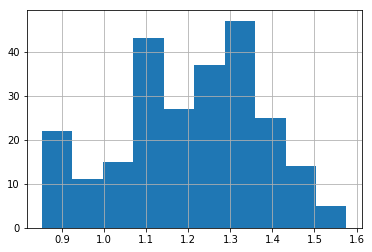

In [5]:
data.EXUSEU.hist()

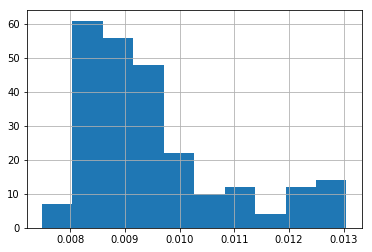

In [6]:
data.EXUSJP.hist()

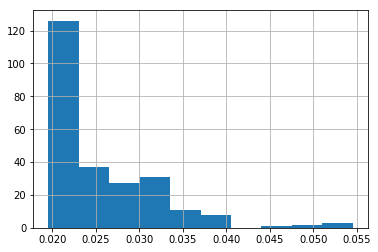

In [7]:
data.EXUSIN.hist()

In [8]:
data.head().T

,0,1,2,3,4
DATE,01-01-1999,01-02-1999,01-03-1999,01-04-1999,01-05-1999
EXUSJP,0.0088269,0.0085713,0.00837009,0.00834918,0.00819676
EXUSIN,0.054529,0.053022,0.051967,0.050235,0.048736
EXUSEU,1.1591,1.1203,1.0886,1.0701,1.063


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA4C2F2160>,
      dtype=object)

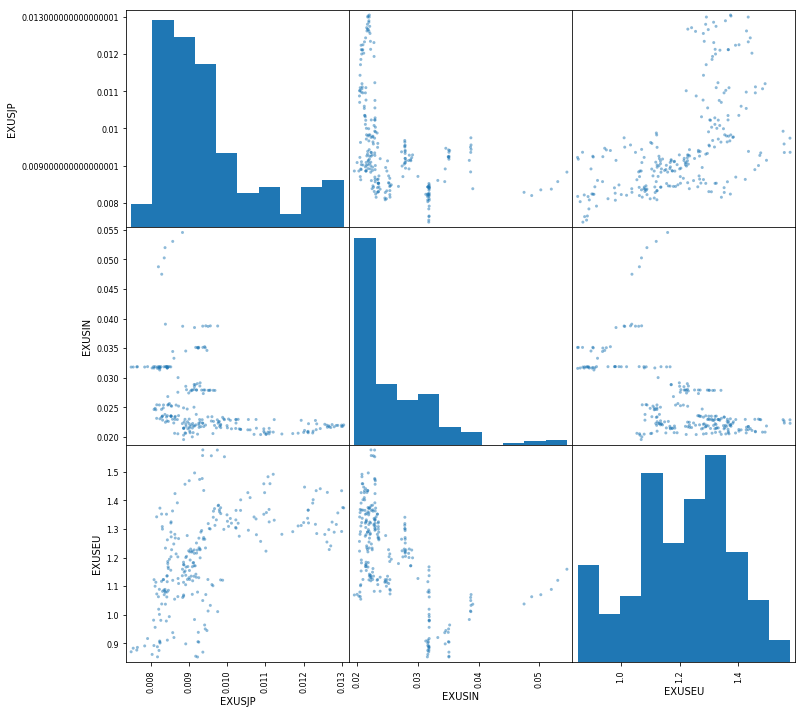

In [9]:
pd.plotting.scatter_matrix(data, figsize=(12,12))

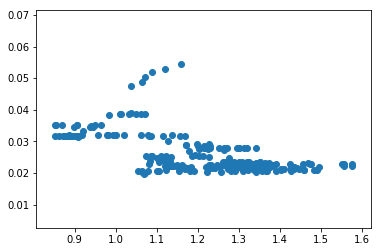

In [10]:
plt.scatter(data.EXUSEU,data.EXUSIN)

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
X=data.iloc[:,2:3]

In [30]:
y=data.iloc[:,-1]
y=y.astype(int) 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train, X_train).fit()

C:\Users\Rohit\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
#m1=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 EXUSEU   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     95.19
Date:                Wed, 03 Jul 2019   Prob (F-statistic):           3.88e-18
Time:                        18:59:43   Log-Likelihood:                 105.25
No. Observations:                 172   AIC:                            -206.5
Df Residuals:                     170   BIC:                            -200.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5884      0.041     39.013      0.000       1.508       1.669
EXUSIN       -14.6619      1.503     -9.757      0.000     -17.628     -11.695
==============================================================================
Omnibus:                        0.559   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.756   Jarque-Bera (JB):                0.677
Skew:                           0.020   Prob(JB):                        0.713
Kurtosis:                       2.695   Cond. No.                         149.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

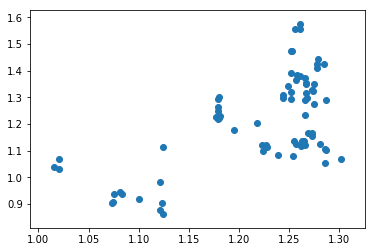

In [19]:
X_test=sm.add_constant(X_test)
y_pred=model.predict(X_test)
plt.scatter(y_pred,y_test)

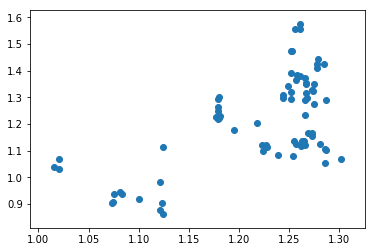

In [20]:
plt.scatter(y_pred,y_test)

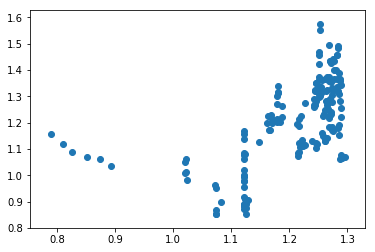

In [21]:
X_test=sm.add_constant(X_test)
y_tpred=model.predict(X_train)
plt.scatter(y_tpred,y_train)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

In [51]:
# Create an empty model
lr = LinearRegression()

In [53]:
# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

0.1516917215688065

In [54]:
# Fit the model to the full dataset
lr.fit(X_test, y_test)

# Print out the R^2 for the model against the full dataset
lr.score(X_test,y_test)

0.4148072603632986

In [55]:
pred = lr.predict(y_train)

In [33]:
X_tr_arr = X_train
X_ts_arr = X_test
y_tr_arr = y_train.as_matrix()
y_ts_arr = y_test.as_matrix()

C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [34]:
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', X_test.shape)

Input Shape (172, 1)
Output Shape (74, 1)


In [35]:
def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

In [36]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

In [37]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

In [38]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [39]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

In [40]:
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.0001,no_iterations=4500)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))

Number of Features 1
Optimized weights [[0.00369333]]
Optimized intercept 0.1558977131363155
Training Accuracy 0.8662790697674418
Test Accuracy 0.8648648648648649


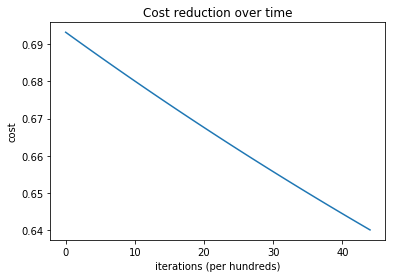

In [41]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

In [42]:
from sklearn.linear_model import LogisticRegression


In [43]:
clf = LogisticRegression()


In [44]:
clf.fit(X_train, y_train)


C:\Users\Rohit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
print (clf.intercept_, clf.coef_)

[1.78445749] [[-0.10575122]]


In [48]:
pred = clf.predict(X_ts_arr)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [49]:
print ('Accuracy from sk-learn: {0}'.format(clf.score(X_ts_arr, y_ts_arr)))

Accuracy from sk-learn: 0.8648648648648649
